In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pprint as pprint
import geopandas

In [ ]:
# File paths
data_path_home_value = "../Data/home_value_interpolated.csv"
data_path_median_income = "../Data/median_income_formatted.csv"
data_path_states = "../Data/states.csv"

In [ ]:
# Function to save figures with numeric-encoded filenames
figure_count = 0

def save_figure(fig_count, filename):
    fig_count = fig_count + 1
    figure_code = f"d{fig_count:02d}_"
    full_path = f"../Images/{figure_code}{filename}"
    print(f"Saving to: {full_path}")
    plt.savefig(full_path)
    return fig_count

In [268]:
# Read home value data
home_value_df = pd.read_csv(data_path_home_value, index_col=0)
home_value_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Interpolated
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,161415.797093,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,...,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255,NaN
2004-02,2004,2,162463.870016,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,...,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088,NaN
2004-03,2004,3,163620.161222,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,...,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142,NaN
2004-04,2004,4,164912.797589,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,...,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633,NaN
2004-05,2004,5,166368.365614,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,...,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502,NaN


In [269]:
# Read median income data
median_income_df = pd.read_csv(data_path_median_income, index_col=0)
median_income_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005-01,2005,1,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006-01,2006,1,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007-01,2007,1,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008-01,2008,1,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [270]:
# Read state data
states_df = pd.read_csv(data_path_states, index_col=0)
states_df.head()

,Code,Lat,Lon
State,,,
Alabama,AL,32.806671,-86.791130
Alaska,AK,61.370716,-152.404419
Arizona,AZ,33.729759,-111.431221
Arkansas,AR,34.969704,-92.373123
California,CA,36.116203,-119.681564


In [271]:
# List home_value_df columns, numbered for reference
hv_list = home_value_df.columns.to_list()
hv_colnum = range(0, len(hv_list))
hv_column_pair = pd.DataFrame(zip(hv_colnum, hv_list))


In [272]:
# List median_income_df columns, numbered for reference
inc_list = median_income_df.columns.to_list()
inc_colnum = range(0, len(inc_list))
inc_column_pair = pd.DataFrame(zip(inc_colnum, inc_list))

In [273]:
# Variables to define to start and end columns for easy reference
start_column = hv_column_pair[hv_column_pair == 'Alabama'].first_valid_index()
end_column = hv_column_pair[hv_column_pair == 'Wyoming'].first_valid_index() + 1
print(f"Start Column = {start_column}\nEnd Column = {end_column}")

Start Column = 3
End Column = 54


In [274]:
# Calculate the means of median home value over the time range
median_home_value_means_df = home_value_df.iloc[:,start_column:end_column].mean()

# Get the top and bottom 5
median_home_value_means_top_5_df = median_home_value_means_df.sort_values(ascending=False)[0:5]
median_home_value_means_top_5_list = median_home_value_means_top_5_df.index
print(median_home_value_means_top_5_list)

median_home_value_means_bottom_5_df = median_home_value_means_df.sort_values(ascending=True)[0:5]
median_home_value_means_bottom_5_df = median_home_value_means_bottom_5_df.sort_values(ascending=False)
median_home_value_means_bottom_5_list = median_home_value_means_bottom_5_df.index
print(median_home_value_means_bottom_5_list)

Index(['Hawaii', 'District of Columbia', 'California', 'Massachusetts',
       'New Jersey'],
      dtype='object')
Index(['Arkansas', 'Mississippi', 'Oklahoma', 'Kentucky', 'West Virginia'], dtype='object')


Saving to: Images/d01_Home_Values_Top_Bottom_2004-2023.png


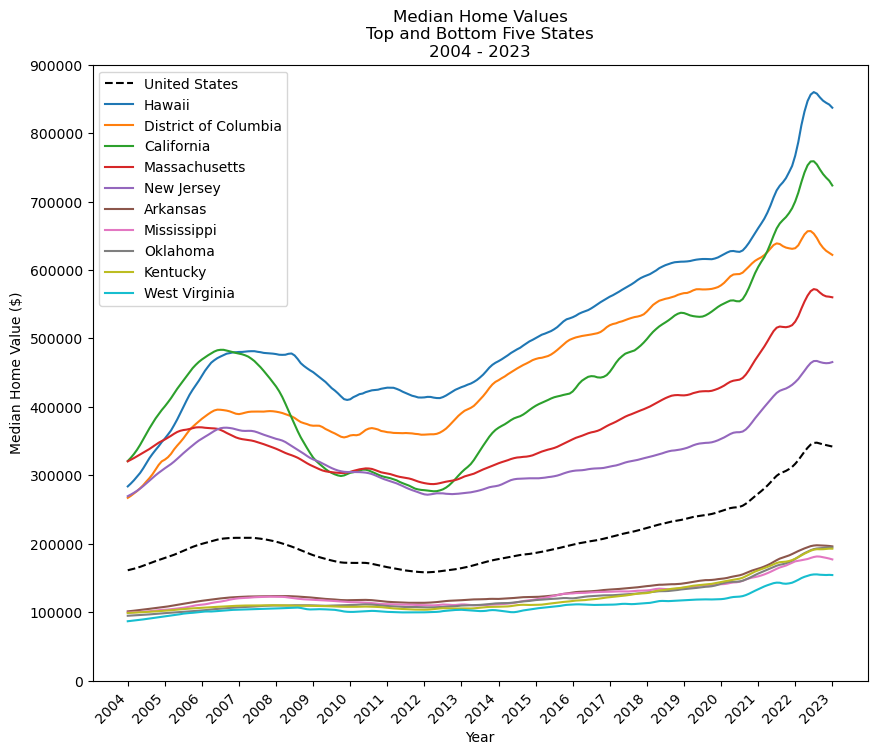

In [275]:
graph_list_hv = median_home_value_means_top_5_list.append(median_home_value_means_bottom_5_list)

plt.figure(figsize=(10,8))
plt.plot(home_value_df.loc[:,"United States"], 'k--', label="United States")
plt.plot(home_value_df.loc[:,graph_list_hv], label=graph_list_hv)
fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend()
plt.title(f"Median Home Values\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.ylim(0, 900000)

figure_count = save_figure(figure_count, "Home_Values_Top_Bottom_2004-2023.png")
plt.show();

In [276]:
# Calculate the net change in overall median home value

home_value_us_2004 = home_value_df.iloc[0:1,2].max()
home_value_us_2023 = home_value_df.iloc[-1:,2].max()
print(home_value_us_2023 - home_value_us_2004)

180759.45341639084


In [277]:
# Calculate the differences between the highest and lowest home values, and the net change from 2004 to 2023

min_2004 = home_value_df.iloc[0:1,start_column:end_column].min().min()
max_2004 = home_value_df.iloc[0:1,start_column:end_column].max().max()


min_2023 = home_value_df.iloc[-1:,start_column:end_column].min().min()
max_2023 = home_value_df.iloc[-1:,start_column:end_column].max().max()

difference_2004 = max_2004 - min_2004
difference_2023 = max_2023 - min_2023

net_change = difference_2023 - difference_2004
print(f"Net change: {net_change}")

pct_change = difference_2023 / difference_2004
print(f"Percentage: {pct_change * 100}")

Net change: 448730.6658712639
Percentage: 291.71194154019037


In [278]:
# Calculate the percent change in overall US median home value

us_median_hv_2004 = home_value_df.iloc[0:1,2].max()
us_median_hv_2023 = home_value_df.iloc[-1:,2].max()

difference_us = us_median_hv_2023 - us_median_hv_2004

pct_change_us = us_median_hv_2023 / us_median_hv_2004

print(f"US Median 2004: {us_median_hv_2004}")
print(f"US Median 2023: {us_median_hv_2023}")

print(f"Net change: {difference_us}")
print(f"Percentage: {pct_change_us * 100}")


US Median 2004: 161415.79709307026
US Median 2023: 342175.2505094611
Net change: 180759.45341639084
Percentage: 211.9837442627547


In [279]:
def graph_home_value_vs_income(states):
    line_style_mhv = ['m-', 'c-', 'r-', 'b-']
    line_style_mhi = ['m--', 'c--', 'r--', 'b--']
    state_list = ""

    for i in range(len(states)):
        fig01, = plt.plot(home_value_df.loc[:,states[i]], line_style_mhv[i], label=f"{states[i]} Home Value")
        fig02, = plt.plot(median_income_df.loc[:,states[i]], line_style_mhi[i], label=f"{states[i]} Income")
        state_list += f"{states[i]}"
        if i < (len(states) - 2):
            state_list += ", "
        elif i < (len(states) - 1):
            state_list += " & "
    fig_xticks = range(0, len(home_value_df), 12)
    fig_labels = home_value_df['Year'][::12]
    plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
    plt.title(f"Median Home Value and Median Household Income\n{state_list}\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
    plt.ylim((0, 900000))
    plt.xlabel("Year")
    plt.ylabel("U.S. Dollars ($)")
    plt.legend()

In [280]:
# Function to create Linear Regression plots
def LinRegressPlot(x_vals, y_vals, txt_loc_tuple, txt_size=16, marker_color='#0485d1', labels=["","",""]):
    plt.scatter(x_vals, y_vals, marker='o', color=marker_color, alpha=1, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)
    
    r_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_vals = (slope * x_vals) + intercept
    plt.plot(x_vals, r_vals, 'r')
    plt.annotate(r_line, txt_loc_tuple, color='r', size=txt_size)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    
    return rvalue**2

Saving to: Images/d02_LinearRegression_Home_Values_Income.png


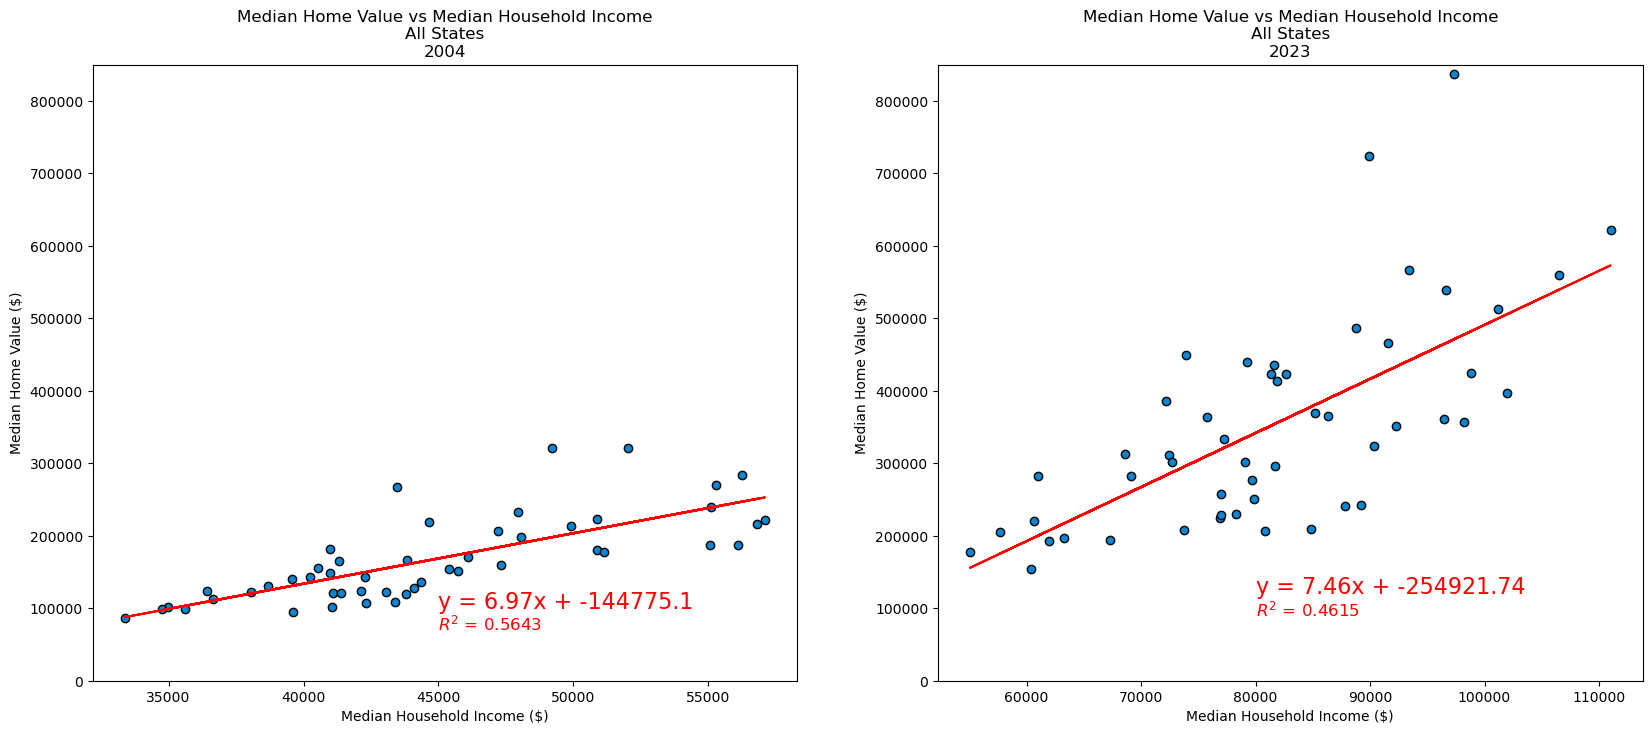

In [281]:
# Linear Regression plots for Home Value vs Household Income, 2004 and 2023

labels = [f"Median Home Value vs Median Household Income\nAll States\n{home_value_df.iloc[0,0]}",
          "Median Household Income ($)",
          "Median Home Value ($)"]

plt.figure(figsize=(20,8))

# Plot 2004 data
plt.subplot(1,2,1)
x_vals = median_income_df.iloc[0:1,start_column:end_column]
y_vals = home_value_df.iloc[0:1,start_column:end_column]

# Drop NA's
drop_list = y_vals.columns[y_vals.isna().any()]
x_vals = x_vals.drop(drop_list, axis=1)
y_vals = y_vals.drop(drop_list, axis=1)

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (45000,100000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (45000, 70000), color='r', size=12)

plt.ylim(0, 850000)

# Plot 2023 data
plt.subplot(1,2,2)
labels = [f"Median Home Value vs Median Household Income\nAll States\n{home_value_df.iloc[-1,0]}",
          "Median Household Income ($)",
          "Median Home Value ($)"]

x_vals = median_income_df.iloc[-1:,start_column:end_column]
y_vals = home_value_df.iloc[-1:,start_column:end_column]

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (80000,120000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (80000, 90000), color='r', size=12)

plt.ylim(0, 850000)

figure_count = save_figure(figure_count, "LinearRegression_Home_Values_Income.png")
plt.show();

In [282]:
# Calculate home value to income ratios for 2004

home_value_income_ratio_2004 = pd.DataFrame()
home_value_income_ratio_2004.index = inc_column_pair[start_column:end_column][1]
home_value_income_ratio_2004.index.name = "State"
home_value_income_ratio_2004['Median Income'] = median_income_df.iloc[0:1,start_column:end_column].squeeze()
home_value_income_ratio_2004['Median Home Value'] = round(home_value_df.iloc[0:1,start_column:end_column].squeeze(),0)
home_value_income_ratio_2004['Ratio'] = home_value_income_ratio_2004['Median Income'] / home_value_income_ratio_2004['Median Home Value']
home_value_income_ratio_2004 = states_df.merge(home_value_income_ratio_2004, on="State")

home_value_income_ratio_2004 = home_value_income_ratio_2004.rename({"District of Columbia": "D.C."})
ratio_top_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2004 = ratio_bottom_5_2004.sort_values("Ratio", ascending=False)

Saving to: Images/d03_Home_Affordability_Top_Bottom_2004.png


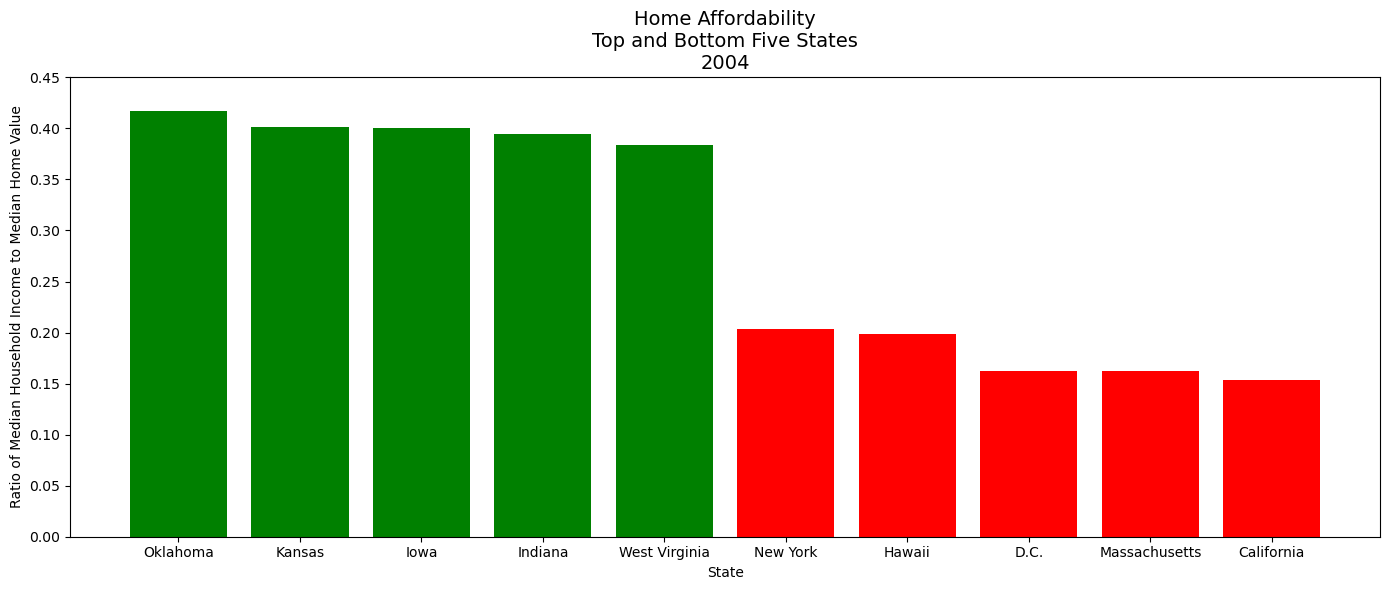

In [283]:
plt.figure(figsize=(14,6))
plt.bar(ratio_top_5_2004.index, ratio_top_5_2004['Ratio'], color='green')
plt.bar(ratio_bottom_5_2004.index, ratio_bottom_5_2004['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nTop and Bottom Five States\n{median_income_df.iloc[0:1,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Household Income to Median Home Value")
plt.tight_layout()
figure_count = save_figure(figure_count, "Home_Affordability_Top_Bottom_2004.png")
plt.show();

In [284]:
# Calculate home value to income ratios for 2023

home_value_income_ratio_2023 = pd.DataFrame()
home_value_income_ratio_2023.index = inc_column_pair[start_column:end_column][1]
home_value_income_ratio_2023.index.name = "State"
home_value_income_ratio_2023['Median Income'] = median_income_df.iloc[-1:,start_column:end_column].squeeze()
home_value_income_ratio_2023['Median Home Value'] = round(home_value_df.iloc[-1:,start_column:end_column].squeeze(),0)
home_value_income_ratio_2023['Ratio'] = home_value_income_ratio_2023['Median Income'] / home_value_income_ratio_2023['Median Home Value']
home_value_income_ratio_2023 = states_df.merge(home_value_income_ratio_2023, on="State")

home_value_income_ratio_2023 = home_value_income_ratio_2023.rename({"District of Columbia": "D.C."})
ratio_top_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2023 = ratio_bottom_5_2023.sort_values("Ratio", ascending=False)

home_value_income_ratio_2023.head()


,Code,Lat,Lon,Median Income,Median Home Value,Ratio
State,,,,,,
Alabama,AL,32.806671,-86.791130,60660.0,220040.0,0.275677
Alaska,AK,61.370716,-152.404419,98190.0,356353.0,0.275541
Arizona,AZ,33.729759,-111.431221,82660.0,423639.0,0.195119
Arkansas,AR,34.969704,-92.373123,63250.0,196303.0,0.322206
California,CA,36.116203,-119.681564,89870.0,723543.0,0.124208


Saving to: Images/d04_Home_Affordability_Top_Bottom_2023.png


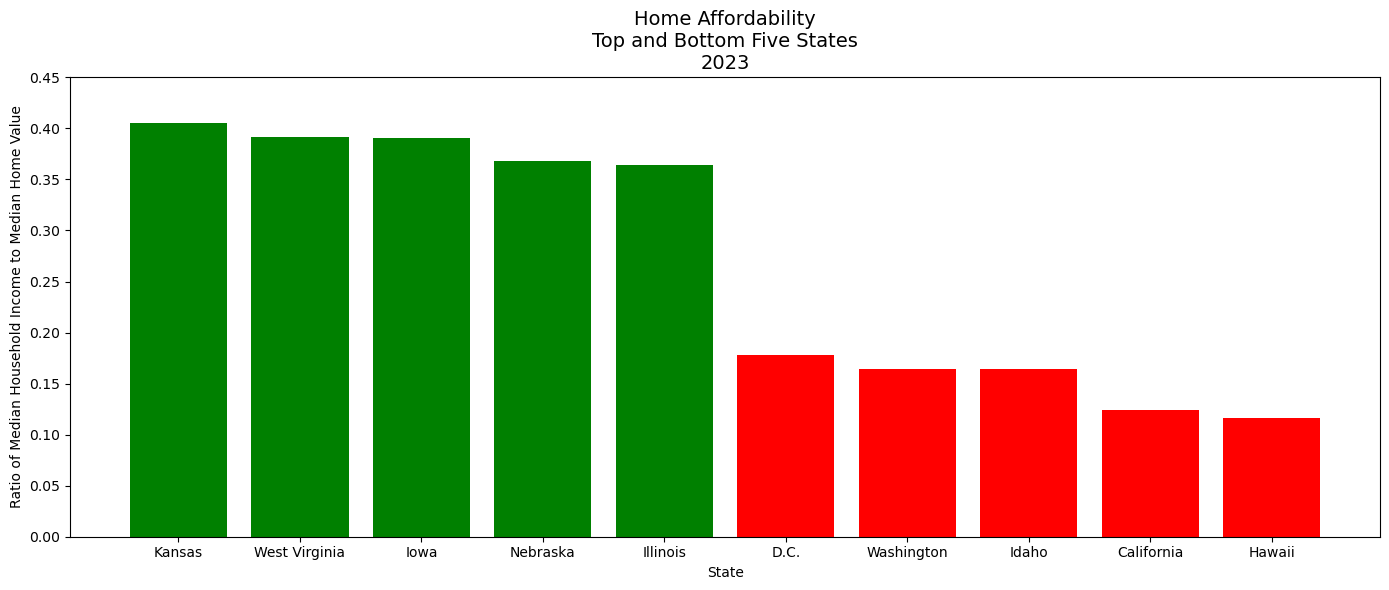

In [285]:
plt.figure(figsize=(14,6))
plt.bar(ratio_top_5_2023.index, ratio_top_5_2023['Ratio'], color='green')
plt.bar(ratio_bottom_5_2023.index, ratio_bottom_5_2023['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Home Affordability\nTop and Bottom Five States\n{median_income_df.iloc[-1:,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Household Income to Median Home Value")
plt.tight_layout()

figure_count = save_figure(figure_count, "Home_Affordability_Top_Bottom_2023.png")
plt.show();

In [286]:
# To use GeoPandas maps:
# conda install geopandas
# pip install pyogrio

# Reference URLs:
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
# https://matplotlib.org/stable/users/explain/colors/colormaps.html


# Map shapefile data:
# https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
# https://www2.census.gov/geo/tiger/TIGER2024/STATE/

In [287]:
# Read Shapefile data
shapefile_shape_path = "Data/tl_2024_us_state/tl_2024_us_state.shp"
state_shape = geopandas.read_file(shapefile_shape_path)

# Change map projection
state_shape = state_shape.to_crs("EPSG:3395")

In [288]:
# Rename STUSPS column for merging
state_shape = state_shape.rename(columns={"STUSPS": "Code"})

# 2004 data
home_value_income_map_2004 = home_value_income_ratio_2004.reset_index()

# Remove Virgin Islands, Northern Mariana Islands, Guam, American Samoa, & Puerto Rico as they are not in the home value or income data sets
not_mapped = ["VI", "MP", "GU", "AS", "PR"]
for unmap in not_mapped:
    state_shape_2004 = state_shape[state_shape["Code"] != unmap]

# Merge home value and income data with shape data
state_shape_2004 = state_shape_2004.merge(home_value_income_map_2004, on="Code", how="outer")

# 2023 data
home_value_income_map_2023 = home_value_income_ratio_2023.reset_index()

# Remove Virgin Islands, Northern Mariana Islands, Guam, American Samoa, & Puerto Rico as they are not in the home value or income data sets
not_mapped = ["VI", "MP", "GU", "AS", "PR"]
for unmap in not_mapped:
    state_shape_2023 = state_shape[state_shape["Code"] != unmap]

# Merge home value and income data with shape data
state_shape_2023 = state_shape.merge(home_value_income_map_2023, on="Code", how="outer")

In [289]:
# Calculate the percent change in affordability
ratios_df = pd.DataFrame({"Code": home_value_income_ratio_2004['Code'], 
                                 "Ratio 2004": home_value_income_ratio_2004['Ratio'],
                                 "Ratio 2023": home_value_income_ratio_2023['Ratio'],
                                 'Percent Change': ((home_value_income_ratio_2023['Ratio'] / home_value_income_ratio_2004['Ratio']) * 100) - 100})
ratios_df.sort_values('Percent Change', ascending=False)


,Code,Ratio 2004,Ratio 2023,Percent Change
State,,,,
Illinois,IL,0.270585,0.363933,34.498918
Massachusetts,MA,0.162284,0.190111,17.147625
Connecticut,CT,0.229234,0.262496,14.510133
Michigan,MI,0.296252,0.336726,13.662047
D.C.,DC,0.162631,0.178409,9.702194
West Virginia,WV,0.384000,0.391284,1.896918
Ohio,OH,0.349931,0.353732,1.086215
Kansas,KS,0.401458,0.405131,0.914838
Nebraska,NE,0.367418,0.367804,0.105128


In [290]:
print(f"# of states with increased affordability = {len(ratios_df[ratios_df['Percent Change'] >= 0])}")
print(f"# of states with decreased affordability = {len(ratios_df[ratios_df['Percent Change'] < 0])}")

# of states with increased affordability = 10
# of states with decreased affordability = 39


Saving to: Images/d05_Map_Home_Affordability_Pct_Change.png


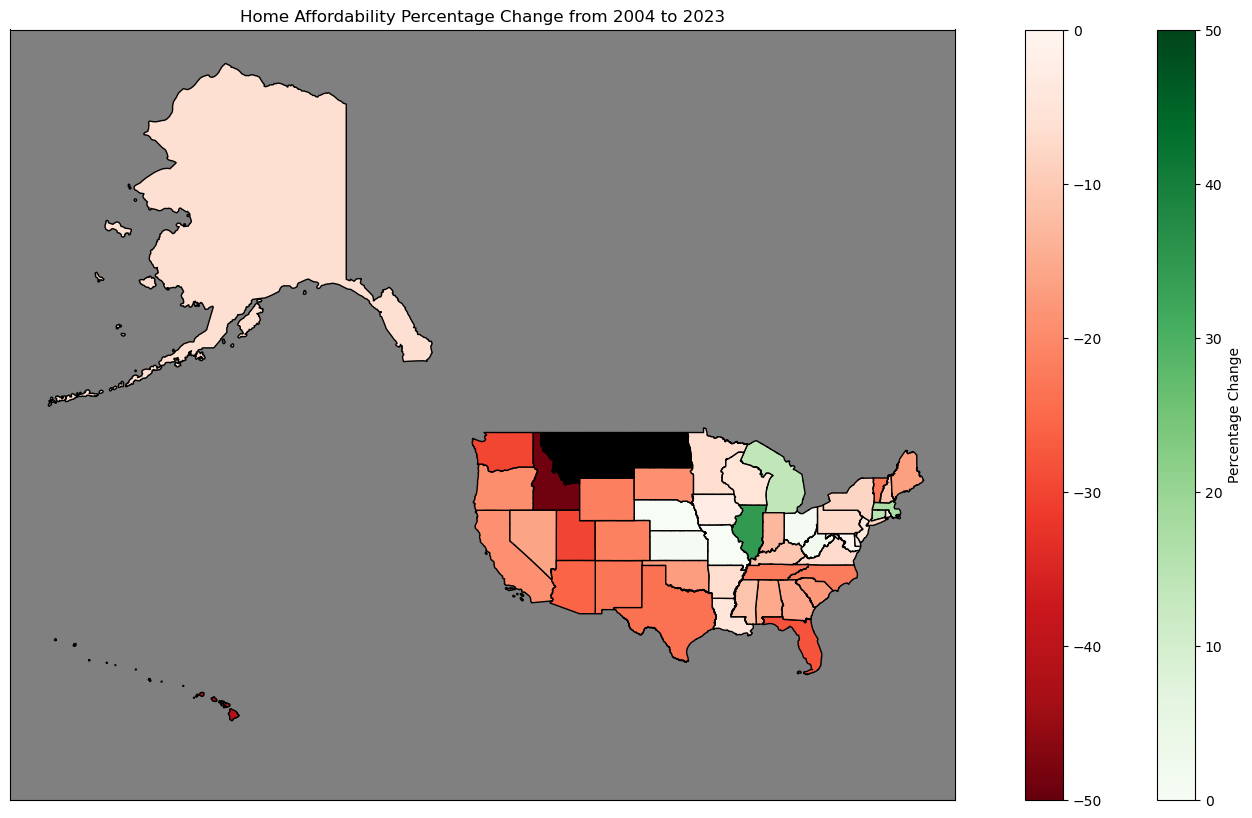

In [291]:
# Map of percent change in home affordability from 2004 to 2023
# These are layered maps to get multiple colors (red < 0, green >= 0, black for na)

# Merge home value and income data with shape data
state_shape_pct = state_shape.merge(ratios_df, on="Code")

fig, ax = plt.subplots(figsize=(20, 10))

# Focus map space
ax.set_ylim(1000000, 12000000)
ax.set_xlim(-20500000, -7000000)

# Remove coordinate axis ticks unnecessary for this plot
ax.set_xticks([])
ax.set_yticks([])

fig1 = state_shape_pct[state_shape_pct['Percent Change'] >= 0].plot(ax=ax, cmap='Greens', column='Percent Change', edgecolor='black', vmin=0, vmax=50,
                                                                    legend=True, legend_kwds={'label': 'Percentage Change', 'pad': -0.05})

fig2 = state_shape_pct[state_shape_pct['Percent Change'] < 0].plot(ax=ax, cmap='Reds_r', column='Percent Change', edgecolor='black', vmin=-50, vmax=0,
                                                                   legend=True)
fig3 = state_shape_pct[state_shape_pct['Percent Change'].isna()].plot(ax=ax, color='Black', edgecolor='black')
fig1.set_facecolor('gray')
plt.title('Home Affordability Percentage Change from 2004 to 2023')

figure_count = save_figure(figure_count, "Map_Home_Affordability_Pct_Change.png")